In [1]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx


my_filepath = '/kaggle/input/modisc61/MODIS_C6_1_USA_contiguous_and_Hawaii_24h.csv'
df = pd.read_csv(my_filepath)


In [2]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,29.95788,-93.88673,300.96,1.49,1.21,2023-12-06,334,T,36,6.1NRT,271.06,14.93,N
1,29.96430,-93.87891,300.93,1.49,1.20,2023-12-06,334,T,21,6.1NRT,270.39,13.22,N
2,31.89175,-85.68315,302.16,1.33,1.14,2023-12-06,336,T,47,6.1NRT,280.04,13.09,N
3,31.49182,-95.97283,300.71,1.89,1.34,2023-12-06,336,T,32,6.1NRT,277.60,20.65,N
4,33.97397,-89.13750,301.11,1.02,1.01,2023-12-06,336,T,38,6.1NRT,277.82,8.59,N


/tmp/ipykernel_42/3147286691.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


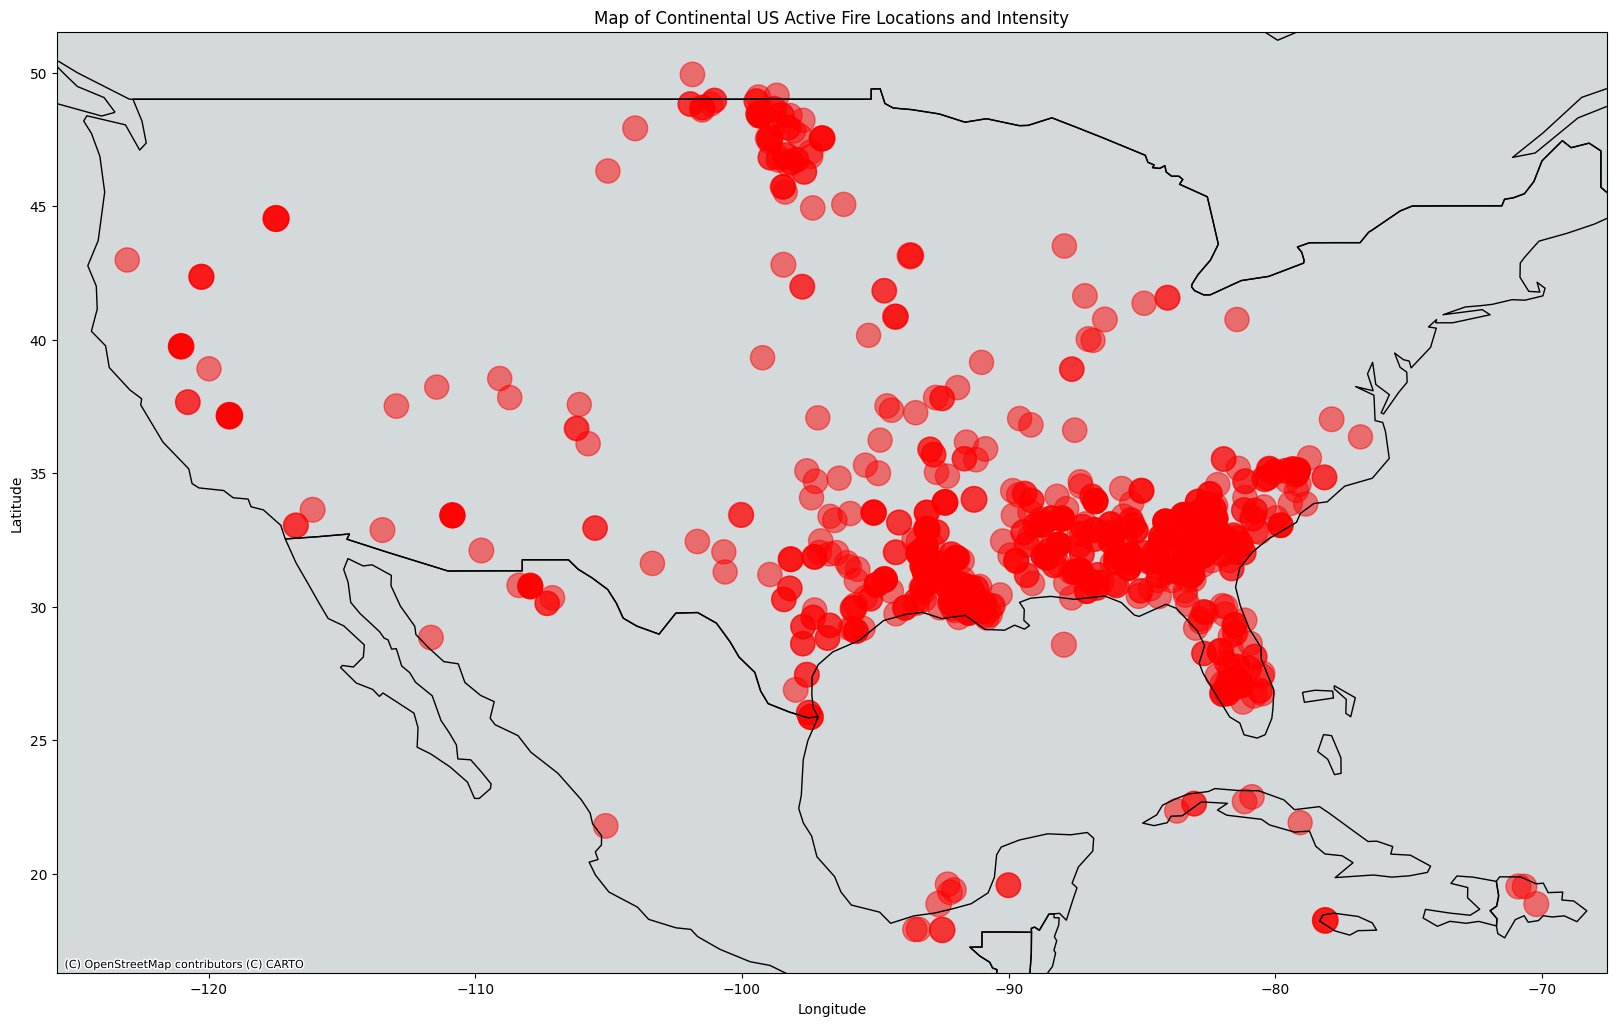

In [13]:



# Assuming the CSV has 'latitude', 'longitude', and 'value_column' columns
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Vary marker size based on the 'value_column'
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['brightness'], alpha=0.5, legend=True)

# Add satellite imagery basemap with a specific zoom level (e.g., zoom=12)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=5)

# Add land boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Set plot title and labels
plt.title('Map of Continental US Active Fire Locations and Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
